### Import Libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Understanding the Data

In [71]:
df = pd.read_csv('extensive_heroes_information_dataset.csv')
df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [72]:
# Let's check the types of the data

df.dtypes

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [73]:
# Change the name of the 'unnamed: 0' and 'name' columns

df.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [74]:
headers = ['Row #', 'Name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']

df.columns = headers

df.columns

Index(['Row #', 'Name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [75]:
# Check how the new df looks like with 2 changes to headers

df.head()

,Row #,Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [76]:
# Let's get some basic stats from this data, or at least from the non-object columns

df[['Height', 'Weight']].describe(include = 'all')

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [77]:
# Next, we will check for any missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Row #       734 non-null    int64  
 1   Name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [78]:
df.isnull().sum()

Row #          0
Name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [79]:
# I will separate them by publisher

df_marvel = df.loc[df['Publisher'] == 'Marvel Comics']
df_dc = df.loc[df['Publisher'] == 'DC Comics']
df_dh = df.loc[df['Publisher'] == 'Dark Horse Comics']

### 'Height'

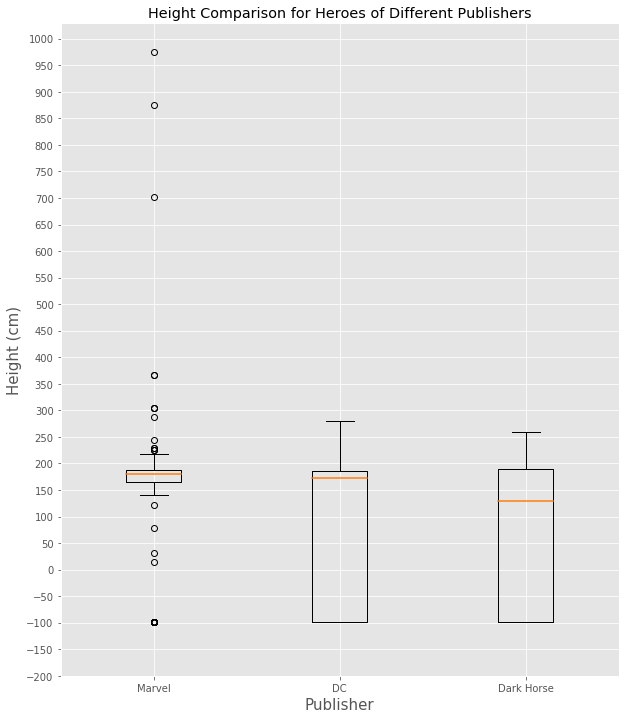

In [80]:
# I want to plot a box and whisker of the height of the heroes in these 3 groups above

df_marvel_height = df_marvel['Height']
df_dc_height = df_dc['Height']
df_dh_height = df_dh['Height']

plt.figure(figsize = (10,12))
plt.title('Height Comparison for Heroes of Different Publishers')
plt.style.use('default')

labels = ['Marvel', 'DC', 'Dark Horse']

plt.boxplot([df_marvel_height, df_dc_height, df_dh_height], labels = labels, medianprops = {'linewidth' : 1.5})
plt.xlabel('Publisher', fontdict = {'fontsize' : 15})
plt.ylabel('Height (cm)', fontdict = {'fontsize' : 15})

plt.yticks(np.arange(-200,1050, 50))


plt.show()

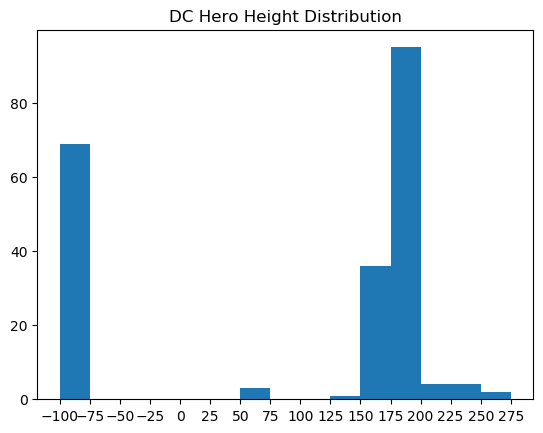

In [81]:
# Even though it probably comes from an error, let's see how the negative data stacks up in terms of distribution
# Let's focus on the data from DC

plt.title('DC Hero Height Distribution')

bins = np.arange(-100, 300, 25)

plt.hist([df_dc_height], bins = bins)

plt.xticks(np.arange(-100,300,25))

plt.show()

In [82]:
# It looks like a lot of heroes might be of height -99cm. This could represent a missing value.
# As a result, let us try to replace the -99 with NaN, to make it clear that they are missing/unknown values

In [83]:
# Count the times where height = -99
df.loc[df['Height'] == -99]

,Row #,Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
711,711,Watcher,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0
712,712,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
713,713,White Canary,Female,brown,Human,Black,-99.0,DC Comics,-,bad,-99.0
715,715,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0


In [84]:
df['Height'] = df['Height'] != -99

In [85]:
df.loc[df['Height'] == -99]

,Row #,Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


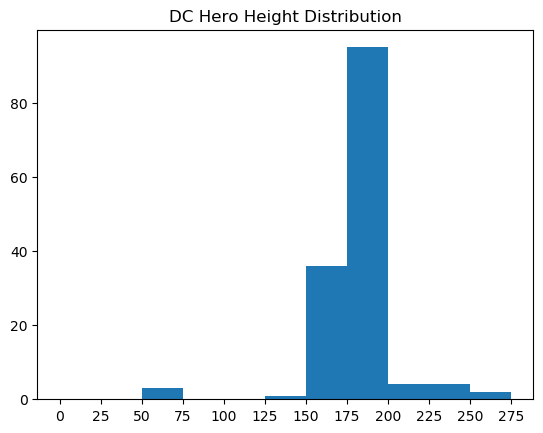

In [86]:
# New visualization

plt.title('DC Hero Height Distribution')

bins = np.arange(0, 300, 25)

plt.hist([df_dc_height], bins = bins)

plt.xticks(np.arange(0,300,25))

plt.show()

### 'Weight'

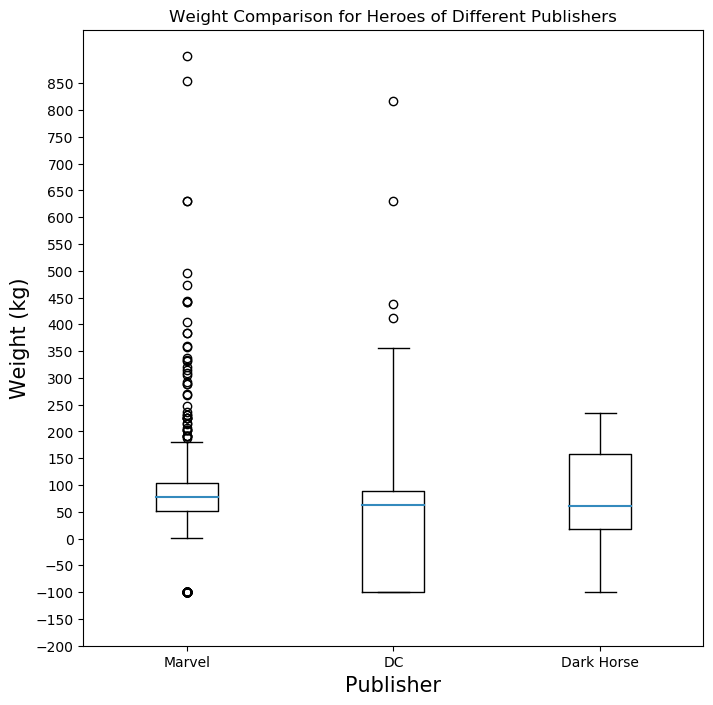

In [87]:
# Box and Whisker for Weight

df_marvel_weight = df_marvel['Weight']
df_dc_weight = df_dc['Weight']
df_dh_weight = df_dh['Weight']

plt.figure(figsize = (8,8))
plt.title('Weight Comparison for Heroes of Different Publishers')
plt.style.use('ggplot')

labels = ['Marvel', 'DC', 'Dark Horse']

plt.boxplot([df_marvel_weight, df_dc_weight, df_dh_weight], labels = labels, medianprops = {'linewidth' : 1.5})
plt.xlabel('Publisher', fontdict = {'fontsize' : 15})
plt.ylabel('Weight (kg)', fontdict = {'fontsize' : 15})

plt.yticks(np.arange(-200, 900, 50))

plt.show()

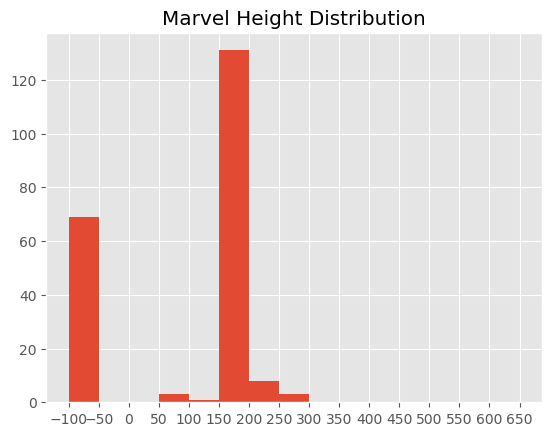

In [89]:
# Marvel Weight Distribution

plt.title('Marvel Height Distribution')

bins = np.arange(-100, 675, 50)

plt.hist([df_dc_height], bins = bins)

plt.xticks(np.arange(-100, 675, 50))

plt.show()

### Good Guys vs Bad Guys

In [93]:
good_guys = df.loc[df['Alignment'] == 'good']
good_guys

,Row #,Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,True,Marvel Comics,-,good,True
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,True,Dark Horse Comics,blue,good,True
2,2,Abin Sur,Male,blue,Ungaran,No Hair,True,DC Comics,red,good,True
6,6,Adam Monroe,Male,blue,-,Blond,False,NBC - Heroes,-,good,False
7,7,Adam Strange,Male,blue,Human,Blond,True,DC Comics,-,good,True
...,...,...,...,...,...,...,...,...,...,...,...
728,728,Yellowjacket,Male,blue,Human,Blond,True,Marvel Comics,-,good,True
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,True,Marvel Comics,-,good,True
730,730,Ymir,Male,white,Frost Giant,No Hair,True,Marvel Comics,white,good,False
731,731,Yoda,Male,brown,Yoda's species,White,True,George Lucas,green,good,True


In [94]:
bad_guys = df.loc[df['Alignment'] == 'bad']
bad_guys

,Row #,Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
3,3,Abomination,Male,green,Human / Radiation,No Hair,True,Marvel Comics,-,bad,True
4,4,Abraxas,Male,blue,Cosmic Entity,Black,False,Marvel Comics,-,bad,False
5,5,Absorbing Man,Male,blue,Human,No Hair,True,Marvel Comics,-,bad,True
11,11,Air-Walker,Male,blue,-,White,True,Marvel Comics,-,bad,True
12,12,Ajax,Male,brown,Cyborg,Black,True,Marvel Comics,-,bad,True
...,...,...,...,...,...,...,...,...,...,...,...
708,708,Warp,Male,brown,-,Black,True,DC Comics,-,bad,True
712,712,Weapon XI,Male,-,-,-,False,Marvel Comics,-,bad,False
713,713,White Canary,Female,brown,Human,Black,False,DC Comics,-,bad,False
727,727,Yellow Claw,Male,blue,-,No Hair,True,Marvel Comics,-,bad,True
